# Курсовой проект по машинному обучению

### Введение
<p style="font-size: 17px; text-align: justify">Машинное обучение(МО) нашло свое применение во многих отраслях. Начиная от простого определение рукописного текста, для его дальнейшей оцифровки и обработки, заканчивая предсказанием серьезных природных катастроф. Этот набор данных содержит ежедневные наблюдения за погодой с многочисленных австралийских метеостанций.
Целевая переменная «Дождь завтра» означает: будет ли идти дождь завтра? Да или нет.</p>

### Содержание
<ol style="font-size: 17px;">
    <li>Разведочный анализ данных. Проведение корреляционного анализа данных.</li>
    <li>Выбор признаков, подходящих для построения моделей.</li>
    <li>Выбор метрик для последующей оценки качества моделей.</li>
    <li>Формирование обучающей и тестовой выборок на основе исходного набора данных.</li>
    <li>Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.</li>
    <li>Подбор гиперпараметров для выбранных моделей.</li>
    <li>Формирование выводов о качестве построенных моделей на основе выбранных метрик.</li>
</ol>

### 1. Разведочный анализ данных. Проведение корреляционного анализа данных.

In [36]:
# Импорт необходимых библеотек
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sns.set(style="ticks")

In [47]:
# Импорт датасета
data = pd.read_csv('weatherAUS.csv')

In [48]:
# Шапка таблицы базы данных
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


#### Описание колонок таблицы
<ol style="font-size: 15px;">
Дата - Дата наблюдения
    
    
LocationThe общее название местоположения метеостанции

MinTemp минимальная температура в градусах Цельсия

MaxTemp Максимальная температура в градусах Цельсия

Количество осадков, зафиксированное за день в мм

Испарение  так так называемое испарение в кастрюле класса A (мм) в течение 24 часов до 9 часов утра

SunshineThe количество часов яркого солнечного света в день.

WindGustDir Направление сильнейшего порыва ветра за 24 часа до полуночи

WindGustSpeed Скорость (км / ч) сильнейшего порыва ветра за 24 часа до полуночи

WindDir9am Направление ветра в 9 утра

WindDir3pm Направление ветра в 3 часа дня

WindSpeed9amWind скорость (км / ч) в среднем за 10 минут до 9 утра

WindSpeed3pmWind скорость (км / ч) в среднем за 10 минут до 3 вечера

Влажность9 утра Влажность (процент) в 9 утра

Влажность3 вечера Влажность (процент) в 3 часа дня

Pressure9am Атмосферное давление (hpa) снижается до среднего уровня моря в 9 утра

Pressure3pm Атмосферное давление (hpa) снижается до среднего уровня моря в 3 часа дня

Cloud9amFraction неба, затененного облаком в 9 утра. Это измеряется в «октах», которые являются единицей восьмых. Это 
записывает, сколько восьмых неба скрыто облаком. Мера 0 указывает на полностью чистое небо, а цифра 8 указывает на то, что оно полностью облачно.

Cloud3pmFraction неба, затененного облаком (в "октах": восьмые) в 3 часа дня. Смотрите Cload9am для описания значений

Температура 9 утра Температура (градусы С) в 9 часов утра

Температура 3 вечераТемпература (градусы C) в 3 часа дня

RainTodayBoolean: 1, если количество осадков (мм) за 24 часа до 9 часов утра превышает 1 мм, в противном случае 0

RISK_MM Количество осадков следующего дня в мм. Используется для создания ответной переменной RainT Tom. Этакая мера «риска».
Дождь завтра - целевая переменная. Завтра будет идти дождь?
</ol>

In [49]:
# Размер датасета 
print("Количество строк:",data.shape[0])
print("Количество колонок:",data.shape[1])

Количество строк: 142193
Количество колонок: 24


In [50]:
# Список колонок с типами данных
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [51]:
# Проверка на пустые значения
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [52]:
# удаление строк, содержащих пустые значения
data = data.dropna(axis = 0, how = 'any')
data = data.drop(['Date'], axis=1)

In [53]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No


In [56]:
#Кодирование категориальных признаков
col = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for c in col:
    temp = pd.get_dummies(data[c])
    data = data.join(temp,rsuffix=str('_'+c))
    data = data.drop(c, axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,SSE_WindDir3pm,SSW_WindDir3pm,SW_WindDir3pm,W_WindDir3pm,WNW_WindDir3pm,WSW_WindDir3pm,No,Yes,No_RainTomorrow,Yes_RainTomorrow
5939,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,1,0,0,0,1,0,1,0
5940,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,1,0,0,0,0,0,1,0,1,0
5942,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,1,0,1,0
5943,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,1,1,0,1,0
5944,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,1,0,1,0,1,0


In [60]:
# Список колонок с типами данных
data.dtypes

MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustSpeed       float64
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RISK_MM             float64
AliceSprings          uint8
Brisbane              uint8
Cairns                uint8
Canberra              uint8
Cobar                 uint8
CoffsHarbour          uint8
Darwin                uint8
Hobart                uint8
Melbourne             uint8
MelbourneAirport      uint8
Mildura               uint8
Moree                 uint8
MountGambier          uint8
                     ...   
NNW_WindDir9am        uint8
NW_WindDir9am         uint8
S_WindDir9am          uint8
SE_WindDir9am         uint8
SSE_WindDir9am      

In [54]:
# Основные статистические характеристки набора данных
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333,2.346960
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543,8.731885
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000,0.000000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000,0.000000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000,0.000000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000,0.600000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000,367.600000


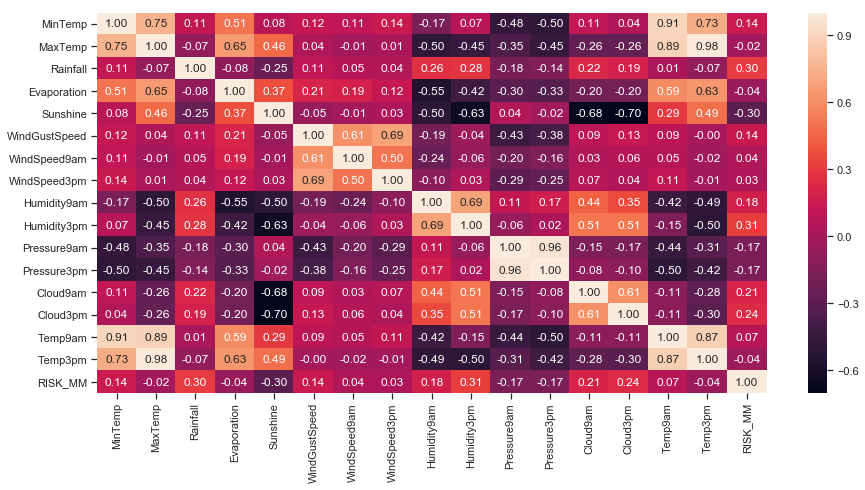

In [55]:
# Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

<p style="font-size: 17px; text-align: justify">Как видно из матрицы, больше всего коррелируют следующие признаки максимальная температура в течении дня и температура в 3 часа дня.</p>

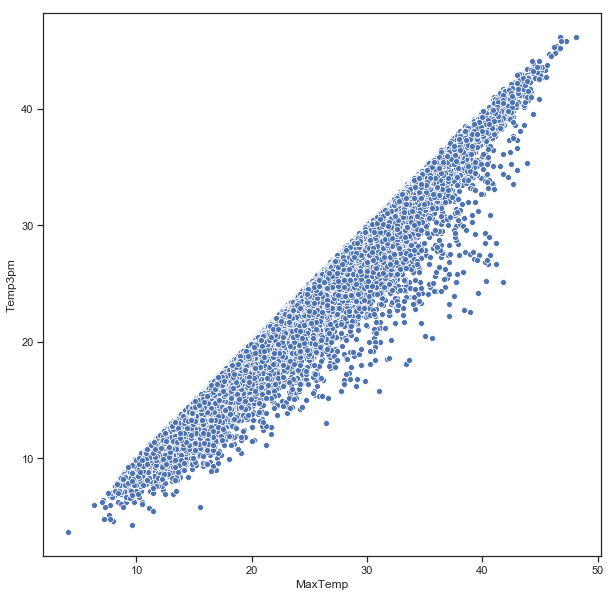

In [57]:
# Построим график этой зависимости
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='MaxTemp', y='Temp3pm', data=data)

In [58]:
# Как видно зависимость линейная

### 2. Выбор признаков, подходящих для построения моделей.

<p style="font-size: 17px; text-align: justify">В результате проведения разведочного анализа данных очевидно, что целевым признаком является наличие дождя завтра</p>

### 3. Выбор метрик для последующей оценки качества моделей.

<p style="font-size: 17px; text-align: justify">В качестве метрики для классификации выберем <b>accuracy
   </b></p>

### 4. Формирование обучающей и тестовой выборок на основе исходного набора данных.

In [73]:
data=data.drop(['No_RainTomorrow', 'Yes', 'No'], axis=1)
X = data.drop(['Yes_RainTomorrow'], axis=1)
Y = data['Yes_RainTomorrow']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state = 0)

In [74]:
print(y_train.shape,y_test.shape,X_train.shape,X_test.shape)

(42315,) (14105,) (42315, 91) (14105, 91)


In [75]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW_WindDir3pm,NW_WindDir3pm,S_WindDir3pm,SE_WindDir3pm,SSE_WindDir3pm,SSW_WindDir3pm,SW_WindDir3pm,W_WindDir3pm,WNW_WindDir3pm,WSW_WindDir3pm
12961,20.1,33.0,0.0,10.4,11.4,31.0,19.0,6.0,60.0,38.0,...,0,0,0,0,1,0,0,0,0,0
98296,2.5,19.7,0.0,0.6,10.3,31.0,15.0,15.0,83.0,50.0,...,0,1,0,0,0,0,0,0,0,0
66534,8.9,15.0,0.0,2.0,1.3,20.0,7.0,6.0,79.0,52.0,...,0,0,0,0,0,0,1,0,0,0
100988,7.4,21.6,2.0,9.0,11.9,50.0,24.0,24.0,71.0,34.0,...,0,0,0,0,0,0,0,1,0,0
74608,8.4,13.1,49.8,3.2,1.0,65.0,33.0,24.0,82.0,68.0,...,0,0,1,0,0,0,0,0,0,0


In [76]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW_WindDir3pm,NW_WindDir3pm,S_WindDir3pm,SE_WindDir3pm,SSE_WindDir3pm,SSW_WindDir3pm,SW_WindDir3pm,W_WindDir3pm,WNW_WindDir3pm,WSW_WindDir3pm
100619,0.6,16.0,0.0,5.8,10.0,35.0,19.0,20.0,55.0,41.0,...,0,0,0,0,0,0,0,0,0,1
32617,19.7,28.4,0.0,7.4,6.0,35.0,11.0,17.0,67.0,64.0,...,0,0,0,0,0,0,0,0,0,0
133657,23.3,38.5,4.8,10.4,10.0,57.0,24.0,9.0,46.0,27.0,...,0,0,0,1,0,0,0,0,0,0
78717,10.8,19.7,0.0,5.2,4.8,35.0,11.0,13.0,72.0,56.0,...,0,0,0,0,0,0,0,0,0,0
33661,8.9,21.8,0.0,1.6,10.1,37.0,13.0,7.0,61.0,30.0,...,1,0,0,0,0,0,0,0,0,0


### 5. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров.

In [84]:
# Градиентный спуск
lr = GradientBoostingClassifier().fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
print("Точность предсказаний: ",round(metrics.accuracy_score(y_test,lr_predictions)*100,3),'%', sep='')

Точность предсказаний: 87.011%


In [88]:
# РандомФорест
rf = RandomForestClassifier().fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
print("Точность предсказаний: ",round(metrics.accuracy_score(y_test,rf_predictions)*100,3),'%', sep='')

Точность предсказаний: 86.989%


In [89]:
# Метод k ближайших соседей
kn = KNeighborsClassifier().fit(X_train,y_train)
kn_predictions = kn.predict(X_test)
print("Точность предсказаний: ",round(metrics.accuracy_score(y_test,kn_predictions)*100,3),'%', sep='')

Точность предсказаний: 69.342%


In [90]:
# Линейная класификация
lc = SGDClassifier().fit(X_train,y_train)
lc_predictions = lc.predict(X_test)
print("Точность предсказаний: ",round(metrics.accuracy_score(y_test,lc_predictions)*100,3),'%', sep='')

Точность предсказаний: 71.245%


In [91]:
# Многослойный классификатор
mc = MLPClassifier().fit(X_train,y_train)
mc_predictions = mc.predict(X_test)
print("Точность предсказаний: ",round(metrics.accuracy_score(y_test,mc_predictions)*100,3),'%', sep='')

Точность предсказаний:  73.182%


In [82]:
col = ['Истинное значение','Град спуск','Ранд форест','KNN','Лин клас','Многослойн клас']
dt = [list(y_test), list(lr_predictions), list(rf_predictions),list(kn_predictions),list(lc_predictions),list(mc_predictions)]
table = pd.DataFrame(columns=col)
for i in range(len(dt[0])):
    table.loc[i] = [dt[0][i], dt[1][i], dt[2][i], dt[3][i], dt[4][i], dt[5][i]]
table.head()

,Истинное значение,Град спуск,Ранд форест,KNN,Лин клас,Многослойн клас
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,1,1,1,0,1,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0


### 6. Подбор гиперпараметров для выбранных моделей.

In [92]:
param_grid  = {
    'n_estimators': np.arange(1, 200, 20),
    'max_depth': np.arange(1,20,2)
}
# Градиентный спуск
lr_grid = GridSearchCV(lr, param_grid, cv=10)
lr_grid.fit(X_train, y_train)

print("Точность предсказаний: ",round(lr_grid.best_score_*100,3),'%',sep='')

Точность предсказаний: 89.082%


In [94]:
# РандомФорест
rf_grid = GridSearchCV(rf, param_grid, cv=10)
rf_grid.fit(X_train, y_train)

print("Точность предсказаний: ",round(rf_grid.best_score_*100,3),'%',sep='')

Точность предсказаний: 87.807%


In [95]:
# Метод k ближайших соседей
kn_grid = GridSearchCV(kn,{'n_neighbors': np.arange(3, 21, 2),'p': np.arange(1,5)}, cv=10)
kn_grid.fit(X_train, y_train)

print("Точность предсказаний: ",round(kn_grid.best_score_*100,3),'%',sep='')

Точность предсказаний: 70.201%


In [96]:
# Линейная класификация
lc_grid = GridSearchCV(lc, {'n_iter_no_change':np.arange(3, 21, 2),'max_iter':np.arange(150,500,50),}, cv=10)
lc_grid.fit(X_train, y_train)

print("Точность предсказаний: ",round(lc_grid.best_score_*100,3),'%',sep='')

Точность предсказаний: 73.141%


In [97]:
# Многослойный классификатор
mc_grid = GridSearchCV(mc, {'n_iter_no_change':np.arange(5,20,5),'max_iter':np.arange(150,500,50)}, cv=10)
mc_grid.fit(X_train, y_train)

print("Точность предсказаний:",round(mc_grid.best_score_*100,3),'%',sep='')

Точность предсказаний:  74.012%


# Вывод: Метеорологи по всеми миру каждый день сталкиваются с проблемой прогнозирования тех или иных погодных условий, в том числе дождя. Уже давно для решения этого вопроса используется технология машинного обучения. Проведя данное исследование я продемонстрировал то, с чем приходится сталкиваться всем метеорологам каждый день. В результате мы получили: лучше всего для данной задачи подходит ансамблевая модель - градиентный спуск,  которая отличилась наиболее точными прогнозами.